*********************COc1ccc(C(O)(c2cncnc2)C2CC2)cc1*********************
prediction: -2.5860622406005858
label: -2.595999956130981
********atom attribution********


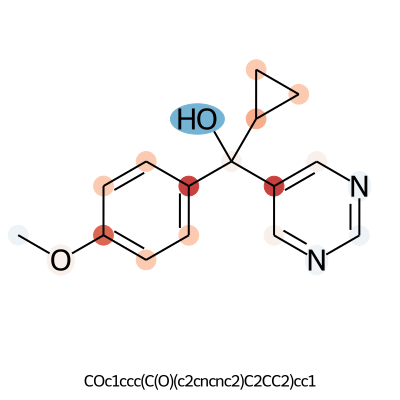

********brics attribution********
[0.0486140115706502, 0.0486140115706502, -0.9765922588628616, -0.9765922588628616, -0.9765922588628616, -0.9765922588628616, 0.398481064816345, 0.398481064816345, -0.4533941624067055, -0.4533941624067055, -0.4533941624067055, -0.4533941624067055, -0.4533941624067055, -0.4533941624067055, -0.5930844721996701, -0.5930844721996701, -0.5930844721996701, -0.9765922588628616, -0.9765922588628616]


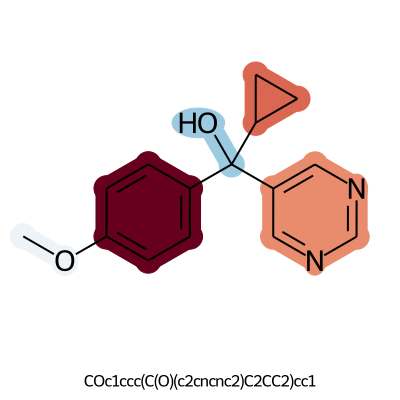


********murcko attribution********
[0.0486140115706502, 0.0486140115706502, -0.9977504826625758, -0.9977504826625758, -0.9977504826625758, -0.9977504826625758, -0.9977504826625758, -0.9977504826625758, -0.9977504826625758, -0.9977504826625758, -0.9977504826625758, -0.9977504826625758, -0.9977504826625758, -0.9977504826625758, -0.9977504826625758, -0.9977504826625758, -0.9977504826625758, -0.9977504826625758, 0.4534067484620788]


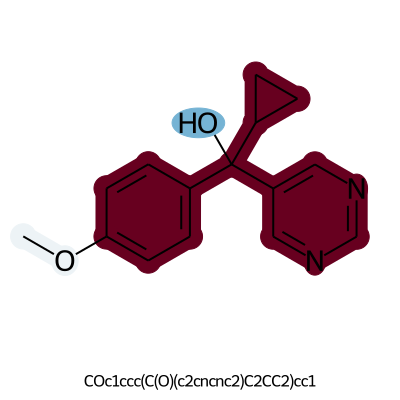


********function group attribution********


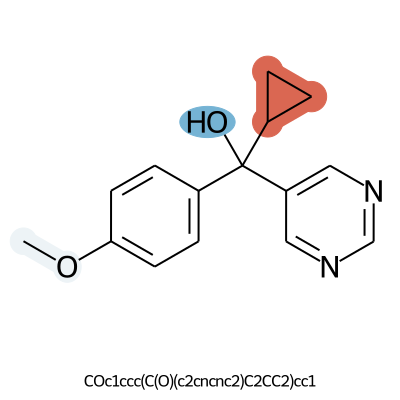


******************************************
*********************CC1CCC(C(C)C)C(O)C1*********************
prediction: -2.6372987747192385
label: -2.5299999713897705
********atom attribution********


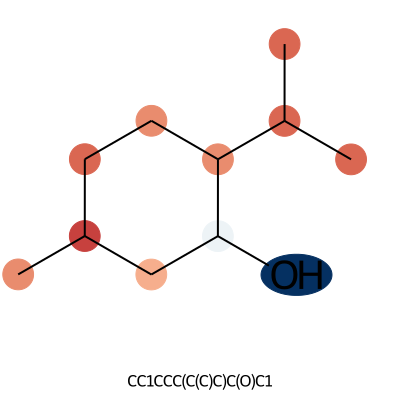

********brics attribution********
[-0.8502617837863972, -0.8502617837863972, -0.8502617837863972, -0.8502617837863972, -0.8502617837863972, -0.9313243904580868, -0.9313243904580868, -0.9313243904580868, -0.8502617837863972, -0.8502617837863972, -0.8502617837863972]


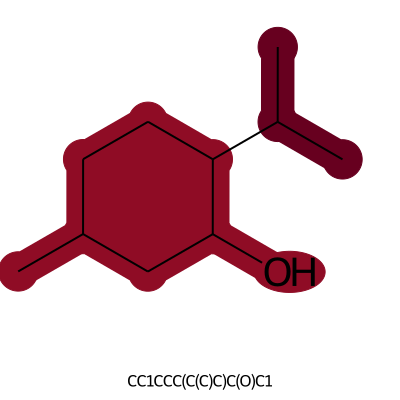


********murcko attribution********
[-0.4875759607043754, -0.9856348770225234, -0.9856348770225234, -0.9856348770225234, -0.9856348770225234, -0.9856348770225234, -0.9856348770225234, -0.9313243904580868, -0.9313243904580868, -0.9313243904580868, 0.9617051716065668]


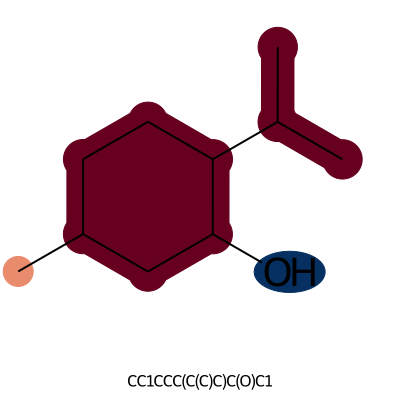


********function group attribution********


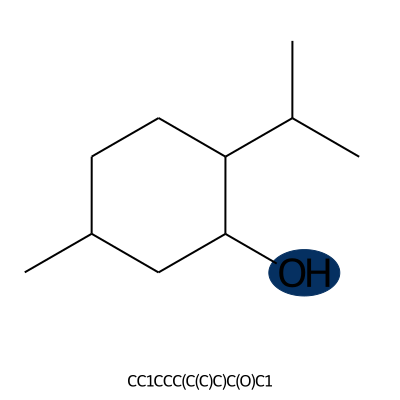


******************************************


In [1]:
import pandas as pd
import numpy as np
from utils import atom_attribution_visualize, sub_attribution_visualize, return_atom_and_sub_attribution, return_bond_sub_index, return_smask_index_i
from IPython.display import Image


task_name = 'ESOL'
# ['-C#CH', '-C#N', '-C(=O)CH3', '-C(=O)N', '-C(=O)O', '-C(=O)OMe', '-CF3', '-N', '-N#N', '-N=C=O', '-N=C=S', '-N=CH2', '-N=N', '-N=NCH3', '-N=O', '-NC(=O)CH3', '-NHSO2CH3', '-NO2', '-O', '-OEt', '-OMe', '-S', '-SCH3', '-SO2CH3', '-SO2Cl', '-SO2NH2', '-SO3CH3', '-SO3H', '-SOCH3', '-X', '-cPropyl', '-tBu', '=N', '=N-O', '=NCH3', '=O', '=S']
selected_fg_group = '-O'
specific_smiles_list = None
specific_smiles_list = ['CC1CCC(C(C)C)C(O)C1', 'COc1ccc(C(O)(c2cncnc2)C2CC2)cc1']

# 只是记录数据的子结构mask情况，这里取seed1的就行
brics_smask_index_list = [x for x in np.load('../prediction/brics/{}_brics_1_train_smask_index.npy'.format(task_name), allow_pickle=True)] + [x for x in np.load('../prediction/brics/{}_brics_1_val_smask_index.npy'.format(task_name), allow_pickle=True)] + [x for x in np.load('../prediction/brics/{}_brics_1_test_smask_index.npy'.format(task_name), allow_pickle=True)]
fg_smask_index_list = [x for x in np.load('../prediction/fg/{}_fg_1_train_smask_index.npy'.format(task_name), allow_pickle=True)] + [x for x in np.load('../prediction/fg/{}_fg_1_val_smask_index.npy'.format(task_name), allow_pickle=True)] + [x for x in np.load('../prediction/fg/{}_fg_1_test_smask_index.npy'.format(task_name), allow_pickle=True)]
murcko_smask_index_list = [x for x in np.load('../prediction/murcko/{}_murcko_1_train_smask_index.npy'.format(task_name), allow_pickle=True)] + [x for x in np.load('../prediction/murcko/{}_murcko_1_val_smask_index.npy'.format(task_name), allow_pickle=True)] + [x for x in np.load('../prediction/murcko/{}_murcko_1_test_smask_index.npy'.format(task_name), allow_pickle=True)]

# 载入attribution数据
data_brics = pd.read_csv('../prediction/attribution/{}_{}_attribution_summary.csv'.format(task_name, 'brics'))
data_fg = pd.read_csv('../prediction/attribution/{}_{}_attribution_summary.csv'.format(task_name, 'fg'))
data_murcko = pd.read_csv('../prediction/attribution/{}_{}_attribution_summary.csv'.format(task_name, 'murcko'))
smiles_list = data_fg['smiles'].tolist()
if selected_fg_group is not None:
    smiles_list = list(set(data_fg[data_fg['sub_name']==selected_fg_group]['smiles'].tolist()))
if specific_smiles_list is not None:
    smiles_list = specific_smiles_list
smiles_list = list(set(smiles_list))


for smiles_i in smiles_list:
    # 获取attribution中smiles_i的碎片index
    brics_index_i = data_brics[data_brics['smiles'] == smiles_i].index.tolist()

    # 根据碎片index获取子碎片mask掉原子的index
    brics_smask_index_i = return_smask_index_i(brics_smask_index_list, brics_index_i)

    # 得到attribution
    brics_attribution_i = data_brics[data_brics['smiles'] == smiles_i].attribution_normalized.tolist()

    murcko_index_i = data_murcko[data_murcko['smiles'] == smiles_i].index.tolist()
    murcko_smask_index_i = return_smask_index_i(murcko_smask_index_list, murcko_index_i)
    murcko_attribution_i = data_murcko[data_murcko['smiles'] == smiles_i].attribution_normalized.tolist()

    fg_index_i = data_fg[data_fg['smiles'] == smiles_i].index.tolist()
    fg_smask_index_i = return_smask_index_i(fg_smask_index_list, fg_index_i)
    fg_attribution_i = data_fg[data_fg['smiles'] == smiles_i].attribution_normalized.tolist()

    atom_attribution_list, sub_attribution_list, sub_bond_attribution_list, bond_list, fg_attribution, fg_atom_list,\
    fg_bond_attribution_list, fg_bond_list, murcko_attribution, murcko_atom_list, murcko_bond_attribution_list,\
    murcko_bond_list, brics_ring_list, brics_ring_attribution_list,  murcko_ring_list, murcko_ring_attribution_list,\
    fg_ring_list, fg_ring_attribution_list = \
        return_atom_and_sub_attribution(smiles_i, brics_smask_index_i, brics_attribution_i, fg_smask_index_i,
                                        fg_attribution_i, murcko_smask_index_i, murcko_attribution_i)

    print("*********************{}*********************".format(smiles_i))
    print('prediction:', data_brics[data_brics['smiles'] == smiles_i].mol_pred_mean.tolist()[0])
    print('label:', data_brics[data_brics['smiles'] == smiles_i].label.tolist()[0])
    print("********{}********".format('atom attribution'))
    display(Image(atom_attribution_visualize(smiles_i, atom_attribution_list, cmap_name='RdBu')))

    print("********{}********".format('brics attribution'))
    print(sub_attribution_list)
    display(Image(sub_attribution_visualize(smiles_i, sub_attribution_list, sub_bond_attribution_list, brics_ring_attribution_list,
                              bond_list=bond_list, ring_list=brics_ring_list, cmap_name='RdBu',sub_type='brics')))
    print()

    print("********{}********".format('murcko attribution'))
    print(murcko_attribution)
    display(Image(sub_attribution_visualize(smiles_i, murcko_attribution, murcko_bond_attribution_list, murcko_ring_attribution_list,
                              murcko_atom_list, murcko_bond_list, murcko_ring_list, cmap_name='RdBu',sub_type='murcko')))
    print()

    if len(fg_smask_index_i) > 0:
        print("********{}********".format('function group attribution'))
        display(Image(sub_attribution_visualize(smiles_i, fg_attribution, fg_bond_attribution_list, fg_ring_attribution_list,
                              fg_atom_list, fg_bond_list, fg_ring_list, cmap_name='RdBu', sub_type='fg')))
        print()
    print("******************************************".format(smiles_i))




